# Spam SMS Detection

## Pipeline:
1.Data Cleaning

2.EDA(exploratory data analysis)

3.Text Preprocessing

4.Model Building

5.Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/spam-datasets/spam_sms_dataset.csv',encoding='ISO-8859-1',on_bad_lines='skip')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Cleaning

In [4]:
# Missing Values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.dropna(subset=['v2'], inplace=True)

In [7]:
df.rename(columns={'v1':'label','v2':'sms'},inplace=True)

In [8]:
# Duplicated Rows
df.duplicated().sum()

403

In [9]:
df = df.drop_duplicates(keep='first')

## EDA

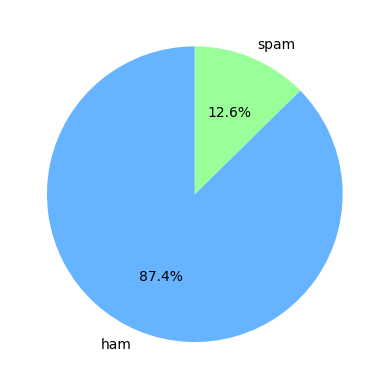

In [10]:
value_counts = df['label'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.show()

In [11]:
# Data is NOT Balanced for both classification Classes

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

/tmp/ipykernel_42/2804047987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = le.fit_transform(df['label'])


In [13]:
df

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Text Preprocessing

In [14]:
# What to do
# 1. Lower case
# 2. Tokenization
# 3. Removing Special Characters
# 4. Removing Stop Words and Punctuation
# 5. Stemming

In [15]:
!pip install nltk

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[1:5]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['me', 'my', 'myself', 'we']

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [19]:
def preprocess_text(text):
  # Lower Case
  text = text.lower()

  # Tokenization
  text = nltk.word_tokenize(text)

  # Removing Special Characters
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  # Stopwrds, punc and stemming
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      i = ps.stem(i)
      y.append(i)


  return " ".join(y)

In [20]:
preprocess_text('I loved lectures on machine learning. How about you?')

'love lectur machin learn'

In [21]:
df['transformed_sms'] = df['sms'].apply(preprocess_text)

/tmp/ipykernel_42/3907773782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_sms'] = df['sms'].apply(preprocess_text)


In [22]:
from wordcloud import WordCloud
we = WordCloud(width=800,height=800,min_font_size=10, background_color='black')

In [44]:
spam = we.generate(df[df['label']==1]['transformed_sms'].str.cat(sep=" "))

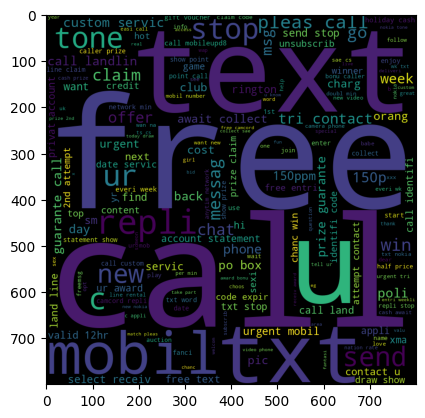

In [46]:
plt.imshow(spam)

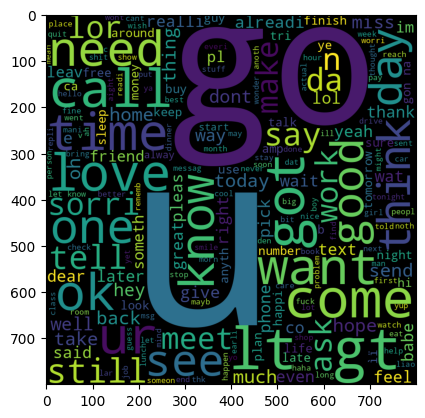

In [48]:
not_spam = we.generate(df[df['label']==0]['transformed_sms'].str.cat(sep=" "))
plt.imshow(not_spam)

## Model Building - ML

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [24]:
X = tfidf.fit_transform(df['transformed_sms']).toarray()

In [25]:
X.shape

(5169, 6629)

In [26]:
y = df['label'].values

In [27]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 17)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [31]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [32]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'MNB': mnb,
#     'BNB': bnb, 
#     'GNB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

clfs = {
    'MNB': mnb
}

In [33]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [34]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  MNB
Accuracy -  0.9642166344294004
Precision -  1.0


In [35]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [36]:
performance_df

,Algorithm,Accuracy,Precision
0,MNB,0.964217,1.0


In [37]:
#Taking MNB 

In [38]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('multinomialNB_model.pkl','wb'))
pickle.dump(preprocess_text,open('preprocess_func.pkl','wb'))